In [1]:
if __name__=="__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    try: 
        from Class10_notebook import *
    except ModuleNotFoundError:
        import os
        import sys
        week5_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), "..", "Week5")) #TJ this creates a path to Week5 files 
        sys.path.insert(0, week5_path) #TJ adds the path to Week5
        from Class10_notebook import *
    import pymangle


In [2]:
#Python task #1 define two caps

def make_mangle_file(name, polygons, weight = None, steradians = None):
    '''Create polygon file from caps

    Needs packages
    -------------
    from Class10_notebook import *


    Parameters
    -------------
    name : type = str - the name of the .ply file that will get created
    polygons : type = list - contains entries for each polygon, each polygon contains all the caps that comprise it
    weights (optional, defaults to 1) : type = list of floats - specifies how many spaces are allocated for each cap for numbers to be generated in
    steradians (optional, defaults to 0) : type = list of floats - defines the area of the region in steradians
    
    use define_cap(RA, Dec, radius) to make a 4-vector for each cap
    
            for example: [1] cap1, cap2, cap3 = define_cap(1, 1, 1), define_cap(2, 2, 2), define_cap(3, 3, 3)
                         [2] polygon = [[cap1, cap2, cap3],[cap1],[cap4, cap5]]
                         [3] weights = [0.5, 1, 2]
                         [4] make_mangle_file('test1', polygon, weight = weights) 
                             will create a file called  test1.ply with 3 polygons:
                             the first has 3 caps, the second has 1 cap, and the third has 2 caps
                             the first region has been deweighted to have half as many points in it, while the third region has twice as many.
                             
                        
    
    Returns
    -------------
    Nothing. But creates a .ply file in the working directory'''
    if weight == None:
        weight = [1]*len(polygons)
    if steradians == None:
        steradians = [0]*len(polygons)
    with open(f"{name}.ply", "w") as file: #TJ open file with writing permission
        file.write(f"{len(polygons)} polygons\n") #TJ first line is just the number of polygons
        for poly in range(len(polygons)):   #TJ for each polygon, title it with polygon 1, polygon 2, etc, add number of caps, weights, and steradians
            file.write(f"polygon {poly+1} ({len(polygons[poly])} caps, {weight[poly]} weight, 0 pixel, {steradians[poly]} str):\n")
            for cap in range(len(polygons[poly])): #TJ for each cap, extract the vector components
                file.write(f"\t{polygons[poly][cap][0]:.12f} {polygons[poly][cap][1]:.12f} {polygons[poly][cap][2]:.12f} {polygons[poly][cap][3]:.12f}\n")



In [3]:
#Python task #2 create mangle files
if __name__ == "__main__":
    cap1 = define_cap(76/15, 36, 5) #TJ generate the 4vectors for each cap as described, note that RA is in hours, so divide by 15 degrees
    cap2 = define_cap(75/15, 35, 5)
    name = 'intersection' #TJ name the file that will get generated
    polygon = [[cap1,cap2]] #TJ assign the array that contains the arrays of caps for each polygon, this one contains a single polygon with two caps
    make_mangle_file(name, polygon) #TJ make the mangle file
    name = 'both_caps'  #TJ name the new file
    polygon = [[cap1],[cap2]] #TJ this one contains two polygons, each with a single cap each
    make_mangle_file(name, polygon) #TJ make the new mangle file


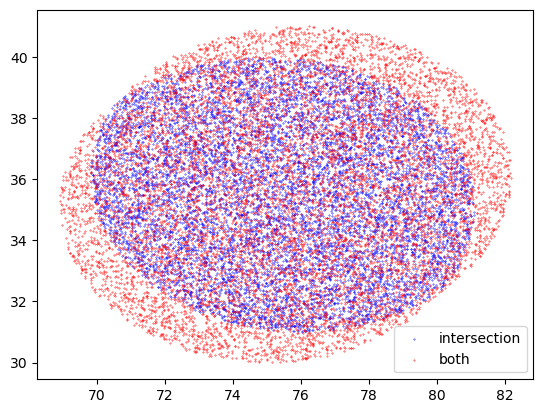

In [4]:
#Python task #3 plot masks
if __name__ == "__main__":
    minter = pymangle.Mangle("intersection.ply") #TJ use mangle package to generate masks for each mangle file
    mboth = pymangle.Mangle("both_caps.ply")
    n_points = 10000
    ra_inter, dec_inter = minter.genrand(n_points) #TJ generate n_points random points within each mask
    ra_both, dec_both = mboth.genrand(n_points)
    plt.scatter(ra_inter,dec_inter, s=0.1, color = 'blue', label = 'intersection') #TJ plot each mask
    plt.scatter(ra_both,dec_both, s=0.1, color = 'red', label = 'both')
    plt.legend()
    plt.show()

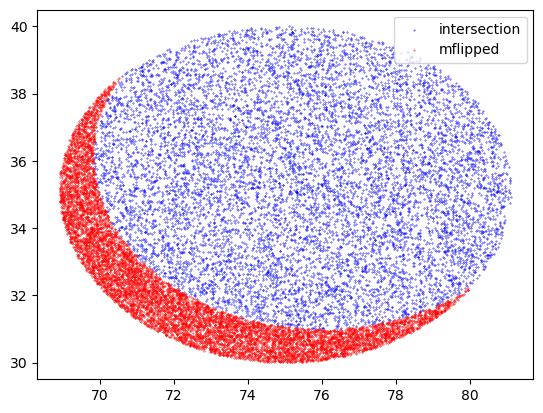

In [5]:
#Python task #4 flip the constraint on cap1
if __name__ == "__main__":
    name = 'mflip1'
    flipped_cap1 = (cap1[0], cap1[1], cap1[2], -cap1[3]) #TJ flip the constraint (1-h component) on cap1
    polygon = [[flipped_cap1, cap2]] #TJ make a new mask that is cap2 and this new flipped cap
    make_mangle_file(name, polygon) 
    minter = pymangle.Mangle("intersection.ply")
    mflipped1 = pymangle.Mangle("mflip1.ply") #TJ this mask represents the region that is INSIDE cap2, but OUTSIDE of cap1
    n_points = 10000
    ra_inter, dec_inter = minter.genrand(n_points)
    ra_flipped1, dec_flipped1 = mflipped1.genrand(n_points)
    plt.scatter(ra_inter,dec_inter, s=0.1, color = 'blue', label = 'intersection')
    plt.scatter(ra_flipped1, dec_flipped1, s=0.1, color = 'red', label = 'mflipped')
    plt.legend()
    plt.show()


In [ ]:
#Python task #5 flip constraint on cap2 and plot all of them
if __name__ == "__main__":
    name = 'mflip2'
    flipped_cap2 = (cap2[0], cap2[1], cap2[2], -cap2[3]) #TJ flip constraint on cap2 this time
    polygon = [[flipped_cap2, cap1]]
    make_mangle_file(name, polygon)
    minter = pymangle.Mangle("intersection.ply")
    mflipped2 = pymangle.Mangle("mflip2.ply") #TJ this mask is now points inside of Cap1 but outside of cap2
    n_points = 10000
    ra_inter, dec_inter = minter.genrand(n_points)
    ra_flipped2, dec_flipped2 = mflipped2.genrand(n_points)
    plt.scatter(ra_inter,dec_inter, s=0.1, color = 'blue', label = 'intersection')
    plt.scatter(ra_flipped2, dec_flipped2, s=0.1, color = 'red', label = 'mflipped2') #TJ these are points outside of cap2
    plt.scatter(ra_flipped1, dec_flipped1, s=0.1, color = 'green', label = 'mflipped1')#TJ these are points outside of cap1
    plt.legend()
    plt.show()


In [ ]:
#python task #6 make both constraints negative
if __name__ == "__main__":
    name = 'double_flip'
    polygon = [[flipped_cap2, flipped_cap1]]
    make_mangle_file(name, polygon)
    minter_double_flipped = pymangle.Mangle("double_flip.ply") #TJ this is now a mask that excludes all points inside EITHER cap1 or cap2
    n_points = 1000000
    ra_double_flip, dec_double_flip = minter_double_flipped.genrand(n_points)
    plt.scatter(ra_double_flip,dec_double_flip, s=0.1, color = 'blue', label = 'double flipped')
    plt.legend('lower left')
    plt.show()
